## Comitê MLP

In [64]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [75]:
#data = pd.read_csv("../datasets/ds_comite_texto.csv")
#data = pd.read_csv("../datasets/ds_comite_full.csv")
#data = pd.read_csv("../datasets2/ds_comite_texto.csv")
#data = pd.read_csv("../datasets2/ds_comite_full.csv")
#data = pd.read_csv("../datasets/ds_comite_textov2.csv")
#data = pd.read_csv("../datasets/ds_comite_fullv2.csv")
#data = pd.read_csv("../datasets2/ds_comite_textov2.csv")
data = pd.read_csv("../datasets2/ds_comite_fullv2.csv")



data.head()

,id,MAIUSCULAS_x,EXCLAMA_x,ASPAS_x,POL_ABSOLUTO_x,funct,pronoun_x,ppron_x,i_x,we_x,...,anger_y,sad_y,rotulo,ADA,GRD,KNN,NB,RF,RL,SVM
0,53,0.155062,0.0,0.0,0.50,0.597229,0.482377,0.292642,0.210033,0.0,...,0.0,0.0,FALSO,0,0,0,1,0,0,0
1,1136,0.032086,0.0,0.0,0.25,0.391333,0.266170,0.173010,0.000000,0.0,...,0.0,0.0,VERDADE,1,1,1,1,1,0,0
2,695,0.727273,0.0,0.0,0.50,0.291783,0.282805,0.245098,0.000000,0.0,...,0.0,0.0,FALSO,0,0,0,1,0,0,0
3,3312,0.069199,0.0,0.0,625.00,0.510839,0.251148,0.139925,0.000000,0.0,...,0.0,0.0,VERDADE,1,1,1,1,1,1,1
4,1314,0.000000,0.0,0.0,0.50,0.505184,0.248368,0.138376,0.000000,0.0,...,0.0,0.0,VERDADE,1,1,1,1,1,1,1


## Separando treino do teste

In [76]:
X = data.drop('id', axis=1)
X = X.drop('rotulo', axis=1)
y = data['rotulo']

In [77]:
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

## Separa o dataset para treino

In [78]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

### SMOTE dataset pq ele é desbalanceado
over = SMOTE(sampling_strategy=1, random_state= 109)
under = RandomUnderSampler(sampling_strategy=1, random_state= 109)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

print('Original dataset:', Counter(encoded_Y))

X, encoded_Y = pipeline.fit_resample(X, encoded_Y)

print('Resampled dataset:', Counter(encoded_Y))


X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.3, random_state=109) 

Original dataset: Counter({1: 613, 0: 379})
Resampled dataset: Counter({0: 613, 1: 613})


## Normaliza os valores

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  


## Treina o modelo

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Input, AlphaDropout
from keras.callbacks import EarlyStopping
import numpy as np

input_dim = X_train.shape[1]

print(input_dim)

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)                   
model.fit(X_train, y_train,epochs=100, batch_size=16, verbose=1, callbacks=[es])


62
Epoch 1/100
54/54 [==============================] - 2s 4ms/step - loss: 0.6195 - accuracy: 0.7315
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9677
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9844
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9778
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9858
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9921
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9944
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9956
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9940
Epoch 10/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9959
Epoch 

## Avaliação e Métricas

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
#pega a predição
#y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[181   5]
 [  3 179]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       186
           1       0.97      0.98      0.98       182

    accuracy                           0.98       368
   macro avg       0.98      0.98      0.98       368
weighted avg       0.98      0.98      0.98       368



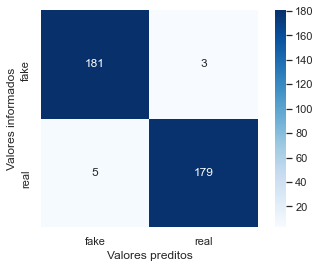

In [82]:
# use seaborn plotting defaults
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Blues", cbar=True,
            xticklabels=['fake','real'],
            yticklabels=['fake','real'])
plt.xlabel('Valores preditos')
plt.ylabel('Valores informados');


In [83]:
score = model.evaluate(X_test, y_test,verbose=1)

12/12 [==============================] - 0s 3ms/step - loss: 8.4873 - accuracy: 0.9783


## Validação Cruzada

In [84]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, f1_score

# dfcv = pd.read_csv("datasets/ds_full_pt.csv")
# X = dfcv.drop('id', axis=1)
# X = X.drop('rotulo', axis=1)
# Y = dfcv['rotulo']

# fix random seed for reproducibility
seed = 109
numpy.random.seed(seed)

scaler = StandardScaler().fit(X)

X = scaler.transform(X)

# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)

#Y = encoded_Y.reshape(-1,1)
Y = encoded_Y



kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

cvscores = []
cvaucs = []
f1s = []
    
for train, test in kfold.split(X, Y):   
    scores = model.evaluate(X[test], Y[test], verbose=0)
    #print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))
    cvscores.append(scores[1])
    
    #Calculo do AUC
    #y_pred_keras = model.predict(X[test]).ravel()
    y_pred_keras = (model.predict(X[test]) > 0.5).astype("int32")
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y[test], y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    #print("auc_keras %.4f%%" % (auc_keras))
    cvaucs.append(auc_keras)
    
    #F1-score
    #f1_pred = model.predict_classes(X[test])
    f1_pred = (model.predict(X[test]) > 0.5).astype("int32")

    f1 = f1_score(Y[test], f1_pred, average="binary")
    f1s.append(f1)
    print("%s: %.4f - AUC %.2f - F1 %.4f " % (model.metrics_names[1], scores[1], auc_keras, f1 ))
    
print(">> Acurácia %.4f (+/- %.4f)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print(">> AUC %.4f (+/- %.4f)" % (numpy.mean(cvaucs), numpy.std(cvaucs)))
print(">> F1 %.4f (+/- %.4f)" % (numpy.mean(f1s), numpy.std(f1s)))

accuracy: 1.0000 - AUC 1.00 - F1 1.0000 
accuracy: 1.0000 - AUC 1.00 - F1 1.0000 
accuracy: 0.9919 - AUC 0.99 - F1 0.9919 
accuracy: 1.0000 - AUC 1.00 - F1 1.0000 
accuracy: 1.0000 - AUC 1.00 - F1 1.0000 
accuracy: 0.9919 - AUC 0.99 - F1 0.9920 
accuracy: 1.0000 - AUC 1.00 - F1 1.0000 
accuracy: 1.0000 - AUC 1.00 - F1 1.0000 
accuracy: 1.0000 - AUC 1.00 - F1 1.0000 
accuracy: 0.9426 - AUC 0.94 - F1 0.9421 
>> Acurácia 0.9926 (+/- 0.0170)
>> AUC 0.9926 (+/- 0.0170)
>> F1 0.9926 (+/- 0.0171)


## Resultados Finais

In [12]:
#y_pred_total = model.predict_classes(X)
y_pred_total = (model.predict(X) > 0.5).astype("int32")

print(confusion_matrix(Y, y_pred_total))
print(classification_report(Y, y_pred_total))

[[189   2]
 [  1 190]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.99      0.99      0.99       191

    accuracy                           0.99       382
   macro avg       0.99      0.99      0.99       382
weighted avg       0.99      0.99      0.99       382



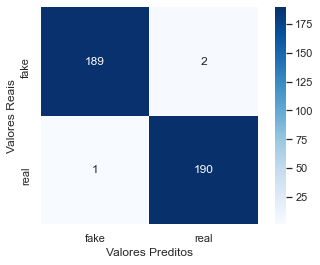

In [13]:
# use seaborn plotting defaults
import seaborn as sns

mat = confusion_matrix(Y, y_pred_total)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="Blues", cbar=True,
            xticklabels=['fake','real'],
            yticklabels=['fake','real'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais');